# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Daffa Eka Pramudita
- **Email:** mdaffa.ekapram@gmail.com
- **ID Dicoding:** dabrut

# Menentukan Pertanyaan Bisnis

- Pada jam berapa penggunaan sepeda mencapai puncaknya dalam sehari?
- Bagaimana pengaruh hari kerja dan hari libur terhadap jumlah penyewa sepeda?
- Bagaimana penggunaan sepeda berdasarkan musim?
- Apakah ada korelasi antara temperatur dan jumlah penyewa sepeda?

# Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [5]:
day_df=pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df=pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- instant: Indeks rekaman data
- dteday: Tanggal
- season: Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)
- yr: Tahun (0 = 2011, 1 = 2012)
- mnth: Bulan (dalam rentang 1 hingga 12)
- hr: Jam (dalam rentang 0 hingga 23)
- holiday: Indikator apakah hari tersebut merupakan hari libur atau tidak
- weekday: Hari dalam seminggu
- workingday: Menunjukkan apakah hari tersebut adalah hari kerja (1 = hari kerja, 0 = hari libur)
- weathersit: Kondisi cuaca yang dikategorikan sebagai berikut:
  - 1: Cerah, berawan sebagian
  - 2: Berkabut + berawan, berkabut + awan terputus, berkabut + sedikit awan, berkabut
  - 3: Hujan ringan, salju ringan, badai petir ringan dengan awan tersebar
  - 4: Hujan lebat + es + badai petir + kabut, salju + kabut
- temp: Suhu dalam skala normalisasi (dalam derajat Celsius), dengan nilai maksimum 41
- atemp: Suhu yang dirasakan dalam skala normalisasi (dalam derajat Celsius), dengan nilai maksimum 50
- hum: Tingkat kelembaban dalam skala normalisasi, dengan nilai maksimum 100
- windspeed: Kecepatan angin dalam skala normalisasi, dengan nilai maksimum 67
- casual: Jumlah pengguna sepeda yang tidak terdaftar
- registered: Jumlah pengguna sepeda yang terdaftar
- cnt: Total jumlah penyewaan sepeda, termasuk pengguna terdaftar dan tidak terdaftar

### Assessing Data

### Menilai tabel day_df dan hour_df

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Mengecek Missing Value dan Duplikasi Data pada Tabel day_csv

In [9]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
print("Jumlah duplikasi pada dataset day_df: ", day_df.duplicated().sum())

Jumlah duplikasi pada dataset day_df:  0


**Insight:**
- Tidak terdapat missing value pada tabel day_df
- Tidak terdapat duplikasi data pada tabel day_df

### Mengecek Missing Value dan Duplikasi Data pada Tabel day_csv

In [11]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
print("Jumlah duplikasi pada dataset hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi pada dataset hour_df:  0


**Insight:**

- Tidak terdapat missing value pada tabel hour_df
- Tidak terdapat duplikasi data pada tabel hour_df

### Melihat Rangkuman dari tabel day_df

In [13]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Terdapat kesalahan tipedata pada variabel dteday (object)

### Melihat Rangkuman dari tabel day_df

In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat kesalahan tipedata pada variabel dteday (object)

### Cleaning Data

### Mengganti Tipedata Pada Tabel day_df

In [15]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Memperbaiki tipedata variabel dteday yang sebelumnya **object** menjadi **datetime**

### Mengganti Tipedata Pada Tabel hour_df

In [18]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [19]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [20]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memperbaiki tipedata variabel dteday yang sebelumnya **object** menjadi **datetime**

# Exploratory Data Analysis (EDA)

## Explore ...

**Pola penggunaan sepeda berdasarkan jam**

In [21]:
hour_group = hour_df.groupby("hr")["cnt"].mean().reset_index()
hour_group

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


**Pola penyewaan sepeda pada hari kerja dan hari libur**

In [22]:
workingday_group = day_df.groupby("workingday")["cnt"].mean().reset_index()
workingday_group

,workingday,cnt
0,0,4330.168831
1,1,4584.820000


**Pola penyewaan sepeda berdasarkan musim**

In [23]:
season_group = day_df.groupby("season")["cnt"].mean().reset_index()
season_group

,season,cnt
0,1,2604.132597
1,2,4992.331522
2,3,5644.303191
3,4,4728.162921


**Pola penyewaan sepeda berdasarkan temperatur**

In [24]:
temp_group = day_df.groupby("temp")["cnt"].mean().reset_index()
temp_group

,temp,cnt
0,0.059130,981.0
1,0.096522,986.0
2,0.097391,1416.0
3,0.107500,2368.0
4,0.127500,1529.0
...,...,...
494,0.834167,5463.0
495,0.838333,3846.0
496,0.848333,3387.0
497,0.849167,3285.0


**Insight:**

**Pola penggunaan sepeda berdasarkan jam**
- Terdapat peningkatan pada pukul 08.00 dan juga 17.00, mungkin ini berkaitan dengan jam berangkat kerja dan juga jam pulang kerja.


---



**Pola penyewaan sepeda pada hari kerja dan hari libur**
- Penyewaan pada hari kerja lebih besar dibandingkan dengan hari libur, namun selisih angkanya tidak terlalu besar


---


**Pola penyewaan sepeda berdasarkan musim**
- Musim gugur memiliki jumlah penyewa sepeda tertinggi dibandingkan dengan musim-musim lainnya. Sebaliknya, musim semi menjadi menjadi musim dengan jumlah penyewa paling sedikit.


---


**Pola penyewaan sepeda berdasarkan temperatur**
- Jumlah penyewa sepeda dengan berbanding lurus dengan kenaikan nilai temperatur. Semakin tinggi(hangat) temperaturnya, semakin tinggi pula jumlah penyewa sepedanya

**Merge kedua tabel**

In [25]:
merged_df = pd.merge(hour_df, day_df, on="dteday", suffixes=("_hourDf", "_dayDf"))
merged_df.head()

,instant_hourDf,dteday,season_hourDf,yr_hourDf,mnth_hourDf,hr,holiday_hourDf,weekday_hourDf,workingday_hourDf,weathersit_hourDf,...,weekday_dayDf,workingday_dayDf,weathersit_dayDf,temp_dayDf,atemp_dayDf,hum_dayDf,windspeed_dayDf,casual_dayDf,registered_dayDf,cnt_dayDf
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [30]:
from google.colab import drive
drive.mount('/content/drive')
merged_df.to_csv('/content/drive/MyDrive/all_data.csv', index=False)

Mounted at /content/drive


# Visualization & Explanatory Analysis

### Pertanyaan 1:
**- Pada jam berapa penggunaan sepeda mencapai puncaknya dalam sehari?**

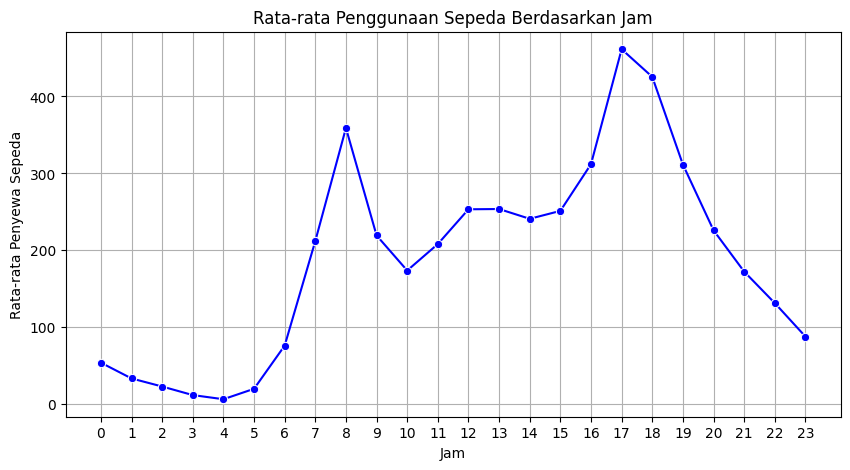

In [26]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="hr", y="cnt", data=hour_group, marker="o", color="blue")
plt.title("Rata-rata Penggunaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewa Sepeda")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Insight:**
- Berdasarkan grafik diatas dapat disimpulkan bahwa puncak penyewaan sepeda berkisar pada pukul 08.00 dan juga pukul 17.00. Hal ini mungkin disebabkan oleh banyaknya orang yang menggunakan sepeda untuk berangkat dan pulang kerja/sekolah. Selain itu, terjadi penurunan pengguna secara drastis pada malam hari

### Pertanyaan 2:
**- Bagaimana pengaruh hari kerja dan hari libur terhadap jumlah penyewa sepeda?**

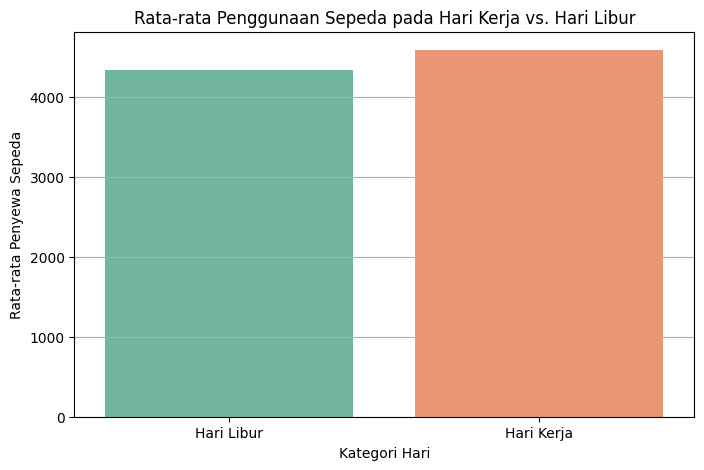

In [27]:
plt.figure(figsize=(8, 5))
sns.barplot(x="workingday", y="cnt", hue="workingday", data=workingday_group, palette="Set2", legend=False)
plt.xticks(ticks=[0, 1], labels=["Hari Libur", "Hari Kerja"])
plt.title("Rata-rata Penggunaan Sepeda pada Hari Kerja vs. Hari Libur")
plt.xlabel("Kategori Hari")
plt.ylabel("Rata-rata Penyewa Sepeda")
plt.grid(axis='y')
plt.show()

**Insight:**
- Rata-rata penggunaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur. Hal ini mungkin disebabkan karena keperluan seperti pergi ke kantor atau sekolah.

### Pertanyaan 3:
**- Bagaimana penggunaan sepeda berdasarkan musim?**

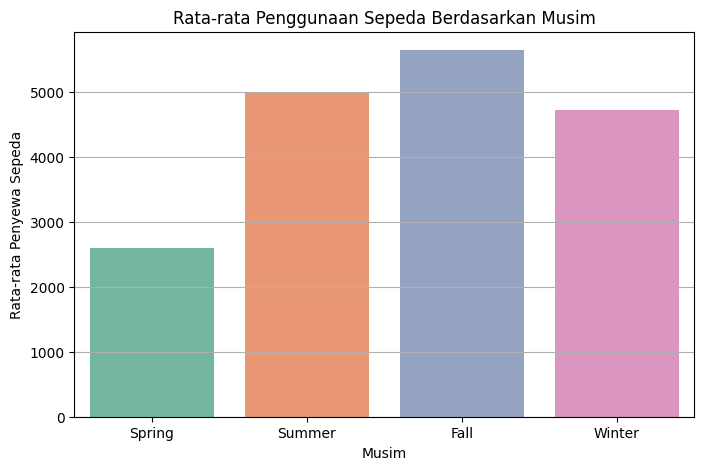

In [28]:
plt.figure(figsize=(8, 5))
sns.barplot(x="season", y="cnt", hue="season", data=season_group, palette="Set2", legend=False)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.title("Rata-rata Penggunaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewa Sepeda")
plt.grid(axis='y')
plt.show()

**Insight:**
- Musim gugur (Fall) memiliki rata-rata jumlah penyewa sepeda tertinggi dan disusul oleh musim panas(Summer). Sedangkan pada musim dingin(Winter) dan musim semi(Spring) rata-rata pengguna sepeda menurun.
- Hal ini mungkin berkaitan dengan suhu udara pada musim tersebut. Pada musim panas dan gugur suhu cenderung sejuk menuju panas. Sedangkan pada musim dingin dan semi suhu udara cenderung dingin sehingga membuat kondisi yang tidak nyaman untuk mengendarai sepeda

### Pertanyaan 4:
**- Apakah ada korelasi antara temperatur dan jumlah penyewa sepeda?**

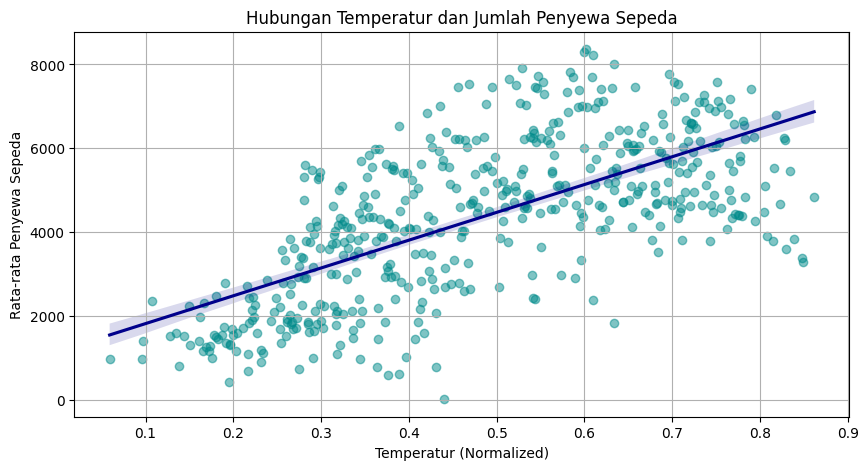

In [29]:
plt.figure(figsize=(10, 5))
sns.regplot(x="temp", y="cnt", data=temp_group, scatter_kws={"color": "darkcyan", "alpha":0.5}, line_kws={"color": "darkblue"})
plt.title("Hubungan Temperatur dan Jumlah Penyewa Sepeda")
plt.xlabel("Temperatur (Normalized)")
plt.ylabel("Rata-rata Penyewa Sepeda")
plt.grid(True)
plt.show()


**Insight:**
- Berdasarkan data grafik dapat disimpulkan bahwa semakin tinggi suhu, semakin banyak pengguna sepeda yang menyewa. Namun, jika suhu terlalu tinggi atau rendah, jumlah penyewa cenderung menurun, yang menunjukkan adanya titik kenyamanan pada suhu tertentu.

# Conclusion

1.   Pada jam berapa penggunaan sepeda mencapai puncaknya dalam sehari?
  - Penggunaan sepeda mencapai puncaknya pada sekitar pukul 08.00 dan pukul 17.00, yang bertepatan dengan jam berangkat dan pulang kerja. Dengan begitu, menyesuaikan layanan penyewaan sepeda pada jam sibuk dapat dilakukan untuk mengakomodasi lonjakan pengguna.

2.   Bagaimana pengaruh hari kerja dan hari libur terhadap jumlah penyewa sepeda?
  - Jumlah rata-rata pengguna sepeda pada hari kerja lebih tinggi daripada hari libur. Sehingga dapat simpulkan bahwa sepeda digunakan lebih banyak untuk pergi ke kantor/sekolah. Oleh karena itu, mengadakan promosi pada hari libur mungkin dapat meratakan jumlah pengguna sepeda

3. Bagaimana penggunaan sepeda berdasarkan musim?
  - Musim gugur menjadi musim dengan pengguna sepeda tertinggi, yang kemudian menurun setelah memasuki musim dingin. Hal ini mungkin berkaitan dengan suhu udara yang terlalu dingin sehingga mengurangi kenyamanan saat mengendarai sepeda. Oleh karena itu, melakukan maintenance kepada sepeda-sepeda selama musim dingin mungkin menjadi solusi yang baik untuk menghadapi lonjakan pengguna pada musim berikutnya

4. Apakah ada korelasi antara temperatur dan jumlah penyewa sepeda?
  - Dapat disimpulkan bahwa kenaikan suhu udara beriringan dengan naiknya pengguna sepeda. Namun, suhu yang terlalu tinggi juga dapat menurunkan angka penggunaan sepeda. Oleh karena itu, mungkin dengan membangun fasilitas pendukung seperti tempat berteduh dapat menjadi solusi, sehingga pengguna dapat beristirahat disaat suhu sedang panas-panasnya